In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [147]:
df = pd.read_csv("./raw-data/raw_data_train.csv")
df.head()

,time_epoch,time,temp_c,temp_f,is_day,condition,wind_mph,wind_kph,wind_degree,wind_dir,...,will_it_rain,chance_of_rain,will_it_snow,chance_of_snow,vis_km,vis_miles,gust_mph,gust_kph,uv,city
0,1729893600,10/26/2024 7:00,11.5,52.7,1,Sunny,2.9,4.7,65,ENE,...,0,0,0,0,10.0,6,5.4,8.6,4,Seoul
1,1726516800,9/17/2024 3:00,26.0,78.8,0,Partly cloudy,8.7,14.0,268,W,...,0,0,0,0,10.0,6,14.9,23.9,0,Bangkok
2,1732172400,11/21/2024 2:00,4.0,39.1,0,Moderate/Heavy Rain,12.3,19.8,226,SW,...,1,100,0,0,10.0,6,17.6,28.3,0,Delhi
3,1735126200,12/25/2024 17:00,24.8,76.7,1,Sunny,13.0,20.9,315,NW,...,0,0,0,0,10.0,6,17.4,28.0,6,Mumbai
4,1744974000,4/18/2025 18:00,30.5,86.9,1,Cloudy/Overcast,11.0,17.6,140,SE,...,0,0,0,0,10.0,6,16.4,26.4,7,Hanoi


# 1. Định dạng lại dữ liệu

## 1.1. Loại bỏ các đặc trưng không cần thiết

Kiểm tra các đặc trưng hiện có

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61471 entries, 0 to 61470
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time_epoch      61471 non-null  int64  
 1   time            61471 non-null  object 
 2   temp_c          61471 non-null  float64
 3   temp_f          61471 non-null  float64
 4   is_day          61471 non-null  int64  
 5   condition       61471 non-null  object 
 6   wind_mph        61471 non-null  float64
 7   wind_kph        61471 non-null  float64
 8   wind_degree     61471 non-null  int64  
 9   wind_dir        61471 non-null  object 
 10  pressure_mb     61471 non-null  int64  
 11  pressure_in     61471 non-null  float64
 12  precip_mm       61471 non-null  float64
 13  precip_in       61471 non-null  float64
 14  snow_cm         61471 non-null  float64
 15  humidity        61471 non-null  int64  
 16  cloud           61471 non-null  int64  
 17  feelslike_c     61471 non-null 

Các đặc trưng không dùng đến ở đây có nghĩa là: 
* Các đặc trưng giống nhau nhưng khác đơn vị đo. Chẳng hạn như temp_c và temp_f,....
* Các đặc trưng đã qua xử lý trước bởi nguồn lấy dữ liệu (chance_of_rain, chance_of_snow,...)
* Một số đặc trưng không có giá trị sử dụng khác (time_epoch,...)

In [149]:
columns_to_drop = ['time_epoch', 'temp_f', 'is_day', 'wind_mph', 'wind_dir', 'pressure_mb', 'precip_in', 'feelslike_f', 'windchill_f',
                   'heatindex_f', 'will_it_rain', 'chance_of_rain', 'will_it_snow', 'dewpoint_f', 'chance_of_snow', 'vis_miles', 'gust_mph', 'city']
df.drop(columns=columns_to_drop, inplace=True)

**Các đặc trưng còn lại sau khi loại bỏ**

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61471 entries, 0 to 61470
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   time         61471 non-null  object 
 1   temp_c       61471 non-null  float64
 2   condition    61471 non-null  object 
 3   wind_kph     61471 non-null  float64
 4   wind_degree  61471 non-null  int64  
 5   pressure_in  61471 non-null  float64
 6   precip_mm    61471 non-null  float64
 7   snow_cm      61471 non-null  float64
 8   humidity     61471 non-null  int64  
 9   cloud        61471 non-null  int64  
 10  feelslike_c  61471 non-null  float64
 11  windchill_c  61471 non-null  float64
 12  heatindex_c  61471 non-null  float64
 13  dewpoint_c   61471 non-null  float64
 14  vis_km       61471 non-null  float64
 15  gust_kph     61471 non-null  float64
 16  uv           61471 non-null  int64  
dtypes: float64(11), int64(4), object(2)
memory usage: 8.0+ MB


## 1.2. Định dạng thời gian

In [151]:
df['time'] = pd.to_datetime(df['time'], format='%m/%d/%Y %H:%M', errors='coerce')

In [152]:
df['date'] = df['time'].dt.date 
df['hour'] = df['time'].dt.hour   


In [153]:
df[['time', 'date', 'hour']].head()

,time,date,hour
0,2024-10-26 07:00:00,2024-10-26,7
1,2024-09-17 03:00:00,2024-09-17,3
2,2024-11-21 02:00:00,2024-11-21,2
3,2024-12-25 17:00:00,2024-12-25,17
4,2025-04-18 18:00:00,2025-04-18,18


In [154]:
df.drop(columns=['time'], inplace=True)
df.head()

,temp_c,condition,wind_kph,wind_degree,pressure_in,precip_mm,snow_cm,humidity,cloud,feelslike_c,windchill_c,heatindex_c,dewpoint_c,vis_km,gust_kph,uv,date,hour
0,11.5,Sunny,4.7,65,30.23,0.00,0.0,54,0,11.5,11.5,11.5,6.2,10.0,8.6,4,2024-10-26,7
1,26.0,Partly cloudy,14.0,268,29.66,0.00,0.0,75,45,28.2,26.0,28.2,21.2,10.0,23.9,0,2024-09-17,3
2,4.0,Moderate/Heavy Rain,19.8,226,29.60,1.35,0.0,90,100,-0.2,-0.2,4.0,2.0,10.0,28.3,0,2024-11-21,2
3,24.8,Sunny,20.9,315,29.87,0.00,0.0,62,6,26.1,24.8,26.1,17.0,10.0,28.0,6,2024-12-25,17
4,30.5,Cloudy/Overcast,17.6,140,29.61,0.00,0.0,84,67,39.9,30.5,39.9,25.5,10.0,26.4,7,2025-04-18,18


# 2. Kiểm tra lặp mẫu và giá trị lỗi

## 2.1. Kiểm tra lặp và giá trị trống

In [155]:
df.duplicated().sum()

np.int64(0)

In [156]:
df.isnull().sum()

temp_c         0
condition      0
wind_kph       0
wind_degree    0
pressure_in    0
precip_mm      0
snow_cm        0
humidity       0
cloud          0
feelslike_c    0
windchill_c    0
heatindex_c    0
dewpoint_c     0
vis_km         0
gust_kph       0
uv             0
date           0
hour           0
dtype: int64

## 2.2. Kiểm tra lỗi định dạng thời gian

In [157]:
print("Số dòng lỗi định dạng ngày:", df['date'].isna().sum())


Số dòng lỗi định dạng ngày: 0


In [158]:
print("Ngày nhỏ nhất:", df['date'].min())
print("Ngày lớn nhất:", df['date'].max())

Ngày nhỏ nhất: 2024-05-23
Ngày lớn nhất: 2025-05-23


In [159]:
print("Giờ nằm ngoài [0-23]:", df[~df['hour'].between(0, 23)].shape[0])

Giờ nằm ngoài [0-23]: 0


# 3. Xử lý các giá trị ngoại lai

## 3.1. Kiểm tra các giá trị ngoại lai

Định nghĩa các đặc trưng số

In [160]:
numerical_features = [col for col in df.columns if col not in ['condition', 'time']]

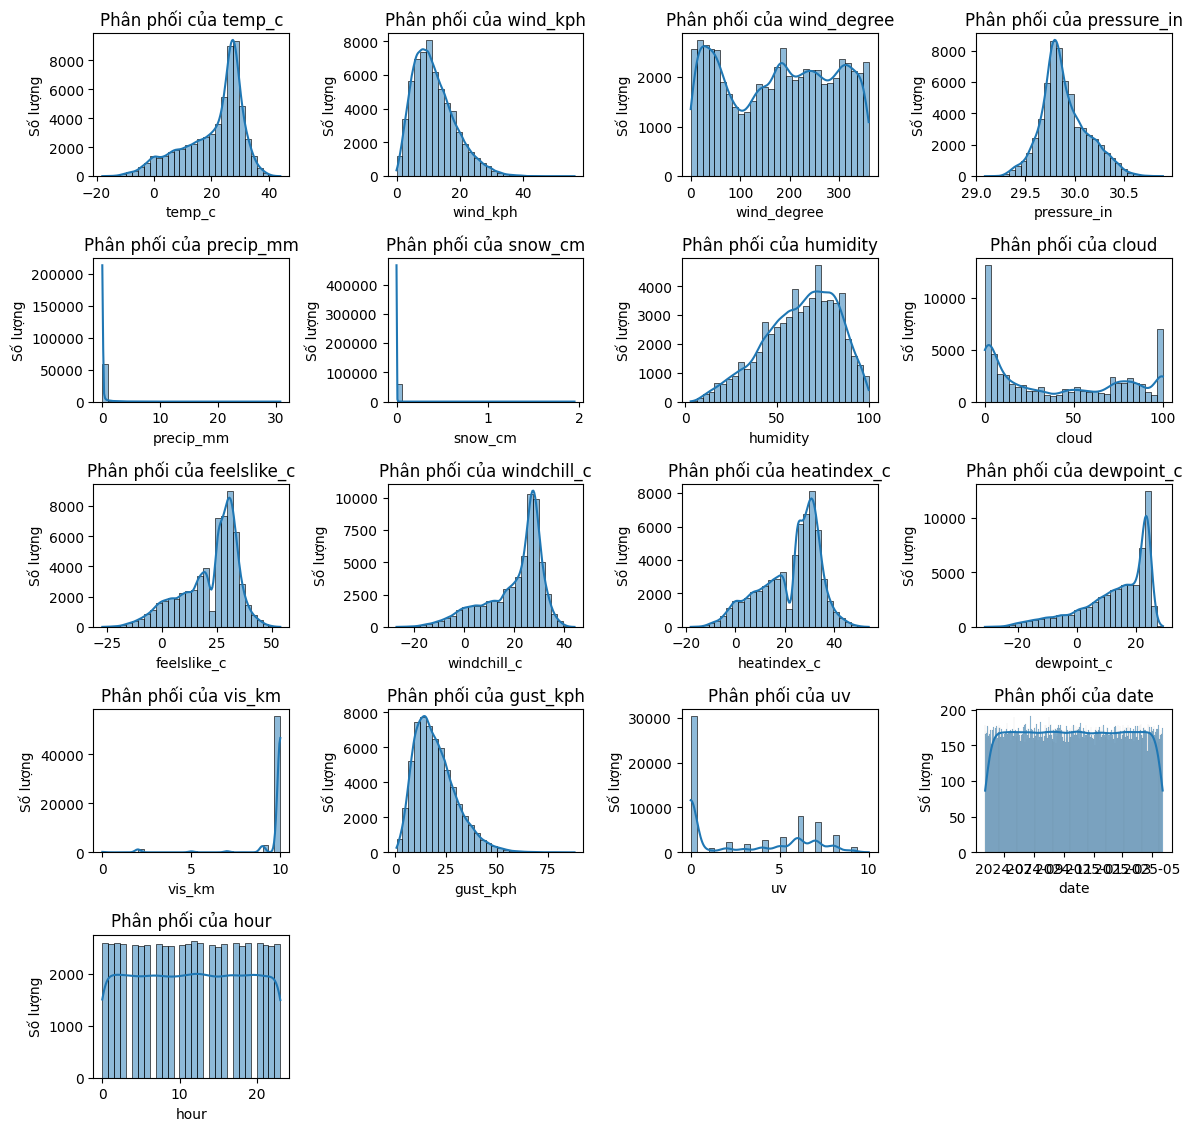

In [161]:
plt.figure(figsize=(12, 20))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot((len(numerical_features) + 1) // 2, 4, i)
    sns.histplot(data=df, x=feature, bins=30, kde=True)
    plt.title(f'Phân phối của {feature}')
    plt.xlabel(feature)
    plt.ylabel('Số lượng')
plt.tight_layout()
plt.show()

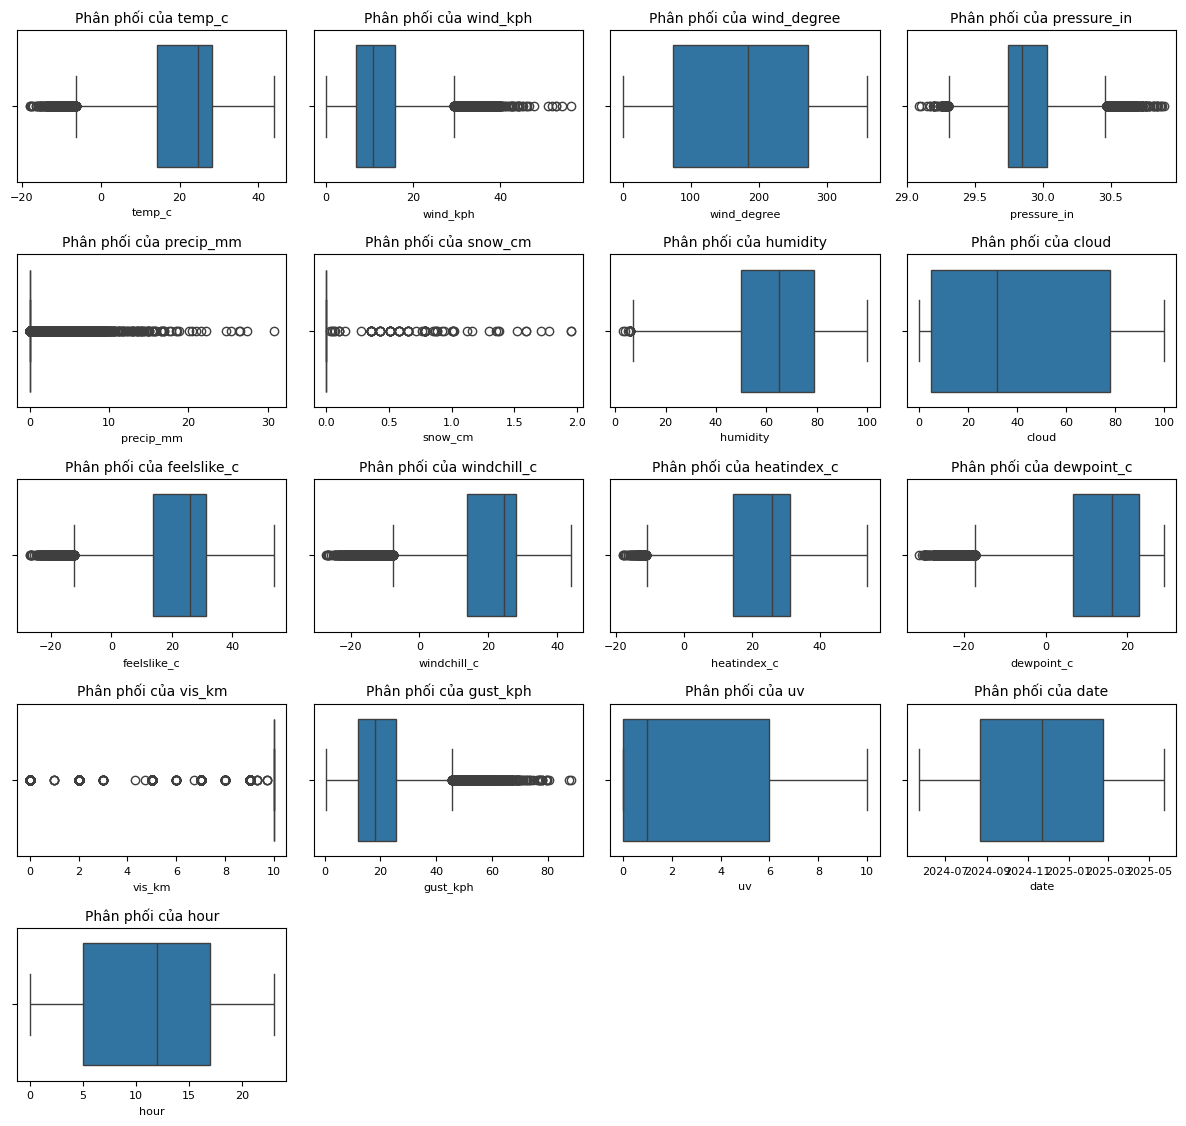

In [162]:
plt.figure(figsize=(12, 20))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot((len(numerical_features) + 1) // 2, 4, i)
    sns.boxplot(data=df, x=feature)  # Đổi y=feature thành x=feature để boxplot nằm ngang
    plt.title(f'Phân phối của {feature}', fontsize=10)
    plt.xlabel(feature, fontsize=8)
    plt.ylabel('')  # Bỏ nhãn trục y vì không cần
    plt.xticks(fontsize=8)
plt.tight_layout()
plt.show()

## 3.2. Kết luận về ngoại lai

Các điểm ngoại lai nằm sát nhau và phân bố khá đều. Điều này là do:
* Phân bố của các loại hình thời tiết trong tập dữ liệu là không đều, nên sẽ dễ dẫn đến việc các loại hình thời tiết ít gặp hơn sẽ bị coi là ngoại lai. Ví dụ như precip_mm (lượng mưa) 
* Các loại thời tiết hiếm (Tuyết, mưa đá,...) làm cho một vài đặc trưng trông có vẻ là chứa nhiều ngoại lai 

Nếu ta cố gắng loại bỏ đi thì các mẫu với loại thời tiết hiếm gặp sẽ hầu như bị mất đi và không thể phân loại


# 4. Áp dụng tương tự với tập Test

In [163]:
df_test = pd.read_csv("./raw-data/raw_data_test.csv")
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26345 entries, 0 to 26344
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time_epoch      26345 non-null  int64  
 1   time            26345 non-null  object 
 2   temp_c          26345 non-null  float64
 3   temp_f          26345 non-null  float64
 4   is_day          26345 non-null  int64  
 5   condition       26345 non-null  object 
 6   wind_mph        26345 non-null  float64
 7   wind_kph        26345 non-null  float64
 8   wind_degree     26345 non-null  int64  
 9   wind_dir        26345 non-null  object 
 10  pressure_mb     26345 non-null  int64  
 11  pressure_in     26345 non-null  float64
 12  precip_mm       26345 non-null  float64
 13  precip_in       26345 non-null  float64
 14  snow_cm         26345 non-null  float64
 15  humidity        26345 non-null  int64  
 16  cloud           26345 non-null  int64  
 17  feelslike_c     26345 non-null 

In [164]:
df_test.drop(columns=columns_to_drop, inplace=True)
df_test.info()
df_test.drop_duplicates(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26345 entries, 0 to 26344
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   time         26345 non-null  object 
 1   temp_c       26345 non-null  float64
 2   condition    26345 non-null  object 
 3   wind_kph     26345 non-null  float64
 4   wind_degree  26345 non-null  int64  
 5   pressure_in  26345 non-null  float64
 6   precip_mm    26345 non-null  float64
 7   snow_cm      26345 non-null  float64
 8   humidity     26345 non-null  int64  
 9   cloud        26345 non-null  int64  
 10  feelslike_c  26345 non-null  float64
 11  windchill_c  26345 non-null  float64
 12  heatindex_c  26345 non-null  float64
 13  dewpoint_c   26345 non-null  float64
 14  vis_km       26345 non-null  float64
 15  gust_kph     26345 non-null  float64
 16  uv           26345 non-null  int64  
dtypes: float64(11), int64(4), object(2)
memory usage: 3.4+ MB


In [165]:
df_test['time'] = pd.to_datetime(df_test['time'], format='%m/%d/%Y %H:%M', errors='coerce')
df_test['date'] = df_test['time'].dt.date 
df_test['hour'] = df_test['time'].dt.hour   

In [166]:
print("Số dòng lỗi định dạng ngày:", df['date'].isna().sum())
print("Ngày nhỏ nhất:", df['date'].min())
print("Ngày lớn nhất:", df['date'].max())
print("Giờ nằm ngoài [0-23]:", df[~df['hour'].between(0, 23)].shape[0])

Số dòng lỗi định dạng ngày: 0
Ngày nhỏ nhất: 2024-05-23
Ngày lớn nhất: 2025-05-23
Giờ nằm ngoài [0-23]: 0


In [167]:
df_test.drop(columns=['time'], inplace=True)
df_test.head()

,temp_c,condition,wind_kph,wind_degree,pressure_in,precip_mm,snow_cm,humidity,cloud,feelslike_c,windchill_c,heatindex_c,dewpoint_c,vis_km,gust_kph,uv,date,hour
0,30.5,Cloudy/Overcast,18.4,155,29.81,0.0,0.0,67,81,35.7,30.5,35.7,23.8,10.0,31.6,7,2024-07-27,13
1,0.4,Partly cloudy,29.5,210,29.68,0.0,0.0,88,58,-5.9,-5.9,0.4,-2.7,10.0,46.2,0,2025-01-18,2
2,5.1,Cloudy/Overcast,17.6,34,30.19,0.0,0.0,91,100,1.5,1.5,5.1,3.7,10.0,26.2,2,2025-05-08,7
3,26.9,Moderate/Heavy Rain,16.9,257,29.55,1.4,0.0,84,92,30.5,26.9,30.5,23.9,10.0,30.1,0,2024-07-15,3
4,6.9,Sunny,9.7,24,30.13,0.0,0.0,17,0,4.9,4.9,6.9,-16.5,10.0,13.0,3,2025-01-19,16


In [168]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26345 entries, 0 to 26344
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temp_c       26345 non-null  float64
 1   condition    26345 non-null  object 
 2   wind_kph     26345 non-null  float64
 3   wind_degree  26345 non-null  int64  
 4   pressure_in  26345 non-null  float64
 5   precip_mm    26345 non-null  float64
 6   snow_cm      26345 non-null  float64
 7   humidity     26345 non-null  int64  
 8   cloud        26345 non-null  int64  
 9   feelslike_c  26345 non-null  float64
 10  windchill_c  26345 non-null  float64
 11  heatindex_c  26345 non-null  float64
 12  dewpoint_c   26345 non-null  float64
 13  vis_km       26345 non-null  float64
 14  gust_kph     26345 non-null  float64
 15  uv           26345 non-null  int64  
 16  date         26345 non-null  object 
 17  hour         26345 non-null  int32  
dtypes: float64(11), int32(1), int64(4), object(2)


# 5. Lưu dữ liệu đã được làm sạch 

In [169]:
df.to_csv("./cleaned-data/clean_data_train.csv", index=False)
df_test.to_csv("./cleaned-data/clean_data_test.csv", index=False)